# Getting starting with Qiskit

Use this notebook to explore the basics of Qiskit.

 **Please only run the following cell if you're running this notebook on Google colab or another cloud hosted notebook server.**.

In [0]:
!pip install qiskit

In [0]:
from qiskit import BasicAer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import IBMQ


from qiskit.tools.monitor import job_monitor
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In the cell below, uncomment the relevant lines and add any gates if you want

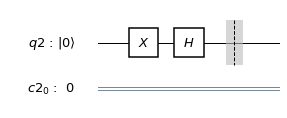

In [0]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

circ = QuantumCircuit(q,c)


# circ.s(q)
# circ.h(q)
circ.x(q)
circ.h(q)
circ.barrier()
# circ.rz(pi/2,q)

# circ.measure(q,c)

circ.draw(output='mpl')

## Running the code 

The following sections allow you to run the circuit on various backends. The following backends are available.

In [0]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

Job Status: job has successfully run


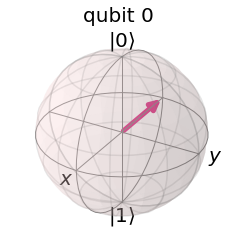

In [0]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(circ,backend)

job_monitor(job)

result = job.result()
psi = result.get_statevector(circ)
plot_bloch_multivector(psi)

Job Status: job has successfully run


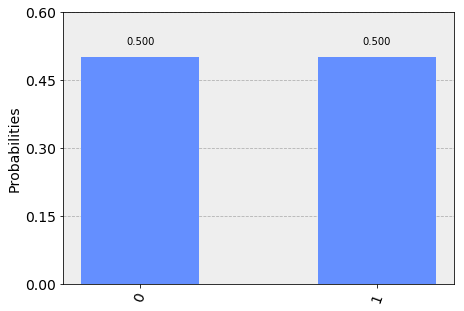

In [0]:
backend = BasicAer.get_backend('qasm_simulator')

job = execute(circ,backend, shots = 1024)

job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Running it on the IBMQ machines

The following cell is only needed if you want to use the IBM Q Experience devices. Please enter your API token between the quotes. Instructions are given [here](https://github.com/Qiskit/qiskit/blob/master/docs/install.rst#access-ibm-q-devices)

In [0]:
token = ''
IBMQ.enable_account(token)
IBMQ.backends()

Job Status: job has successfully run


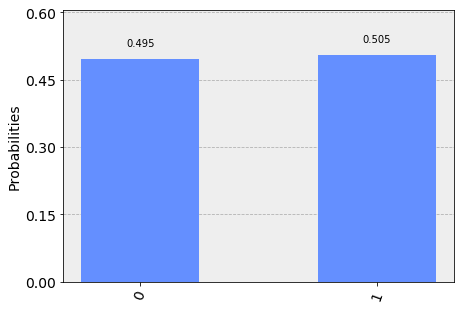

In [0]:
backend = IBMQ.get_backend('ibmq_16_melbourne')
job = execute(circ,backend, shots=8192)

job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)